# Normalization 

It is a technique applied for data preparation for machine learning, it's main goal is to change the values of numeric columns in the dataset to use a common scale, without distorting the differencdes in the ranges of values or losing information 



if dealing with numerical quantities it's always better to remove units  for better results . i.e just keep the magnitude in common scale 


<h3> Some types of normalization </h4>

1. MinMax Scaling

2. Robust Scaling 

3. Mean Normalization

4.  Max absolute Scaling 



In minmax scaler value is scaled from 0 to 1 

the formula for applying min max scaling 
(x-xmin)/ (x max - x min )

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

In [3]:
data = pd.read_csv('../dataset/ipl.csv')

data.head()



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.describe()


new = data[['win_by_runs', 'win_by_wickets']].copy()



new

,win_by_runs,win_by_wickets
0,35,0
1,0,7
2,0,10
3,0,6
4,15,0
...,...,...
631,0,6
632,0,4
633,22,0
634,0,4


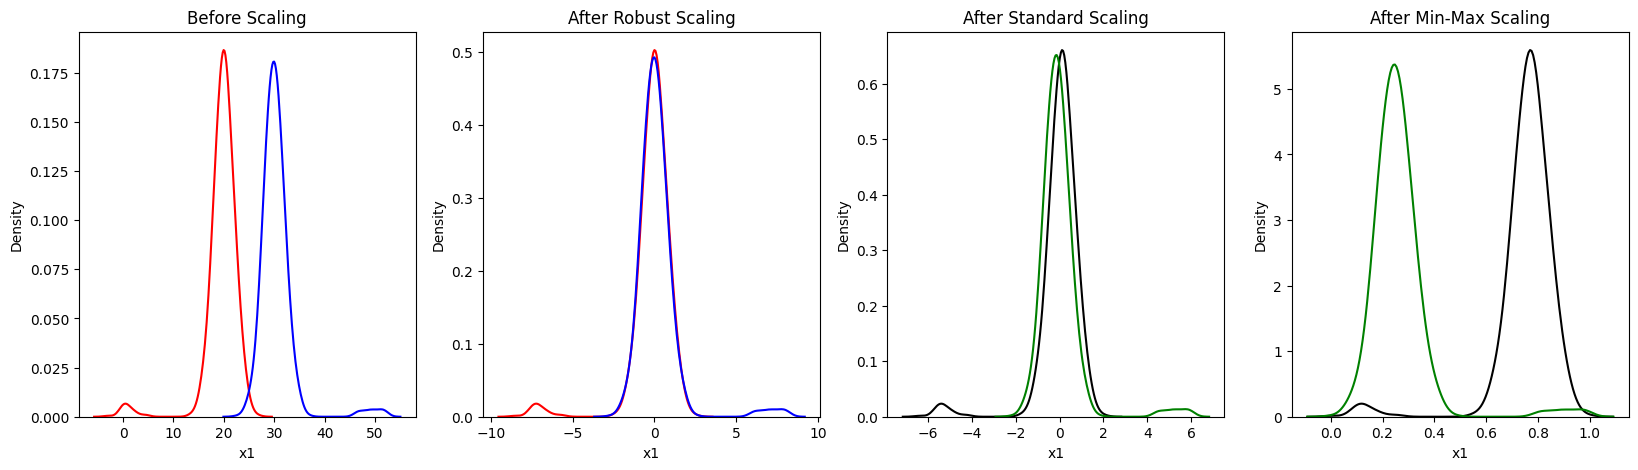

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax=ax2, color='red')
sns.kdeplot(robust_df['x2'], ax=ax2, color='blue')
ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax=ax3, color='black')
sns.kdeplot(standard_df['x2'], ax=ax3, color='g')
ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax=ax4, color='black')
sns.kdeplot(minmax_df['x2'], ax=ax4, color='g')
plt.show()

# Robust scaling 

It uses median and Interquartile range (IQR ) to scale the value. 
It measures the distance between each data points in terms of IQR using the formula 


(Original value - Input's median)/Input's IQR 

The scaled values will have the median between 0 to 1 

It is mostly used in case of Outliers . 


In [6]:
import numpy as np
import pandas as pd

data = np.random.normal(0, 15, 30)
data_df = pd.DataFrame({"data":data})

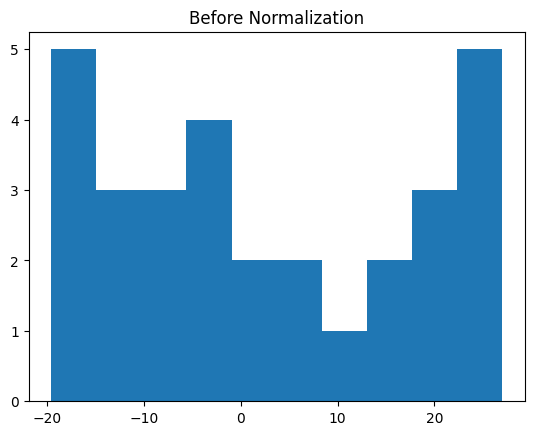

In [7]:
import matplotlib.pyplot as plt

plt.hist(data_df['data'], bins=10)
plt.title('Before Normalization')
plt.show()

In [8]:
outliers = np.random.uniform(240, 250, 5)
data_df = pd.DataFrame({
    "data": np.append(data, outliers)
})

Text(0.5, 1.0, 'After Adding Outliers')

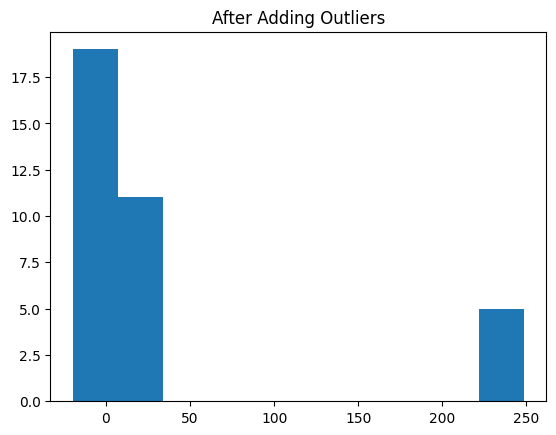

In [9]:
plt.hist(data_df['data'], bins=10)
plt.title('After Adding Outliers')


In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(data_df)


robust_scaled = scaler.transform(data_df)



from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(data_df)

standard_scaled = standard.transform(data_df)


In [11]:
scaled_values = pd.DataFrame({
    'Standard': standard_scaled.reshape(-1),
    'Robust': robust_scaled.reshape(-1)
})

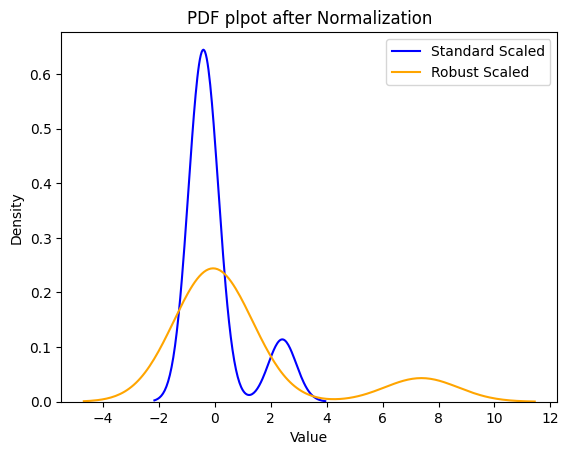

In [12]:
import seaborn as sns 

pdf_plot = sns.kdeplot(scaled_values['Standard'], label='Standard Scaled', color='blue')
pdf_plot = sns.kdeplot(scaled_values['Robust'], label='Robust Scaled', color='orange')

plt.title('PDF plpot after Normalization')
plt.xlabel('Value')
plt.legend()
plt.show()


Robust scaled performed better than standard scaler when there is outliers in the data  . 